<a href="https://colab.research.google.com/github/hamzaodeh/Group-A-DLI-Assignment/blob/main/DNN2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/network-intrusion-dataset


In [4]:
import os
import numpy as np
import pandas as pd

from unidecode import unidecode

import tensorflow as tf
from tensorflow import keras

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dropout, Activation, Flatten, Convolution1D, Dropout, Reshape
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")

No GPU device found


In [6]:
import pandas as pd
import glob

path = r'/kaggle/input/network-intrusion-dataset' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='cp1252', index_col=None, header=0)
    li.append(df)
    print("Read Completed for ", filename)

df = pd.concat(li, axis=0, ignore_index=True)

df = df.rename(columns={' Label': 'Label'})

Read Completed for  /kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Read Completed for  /kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Read Completed for  /kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
Read Completed for  /kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Read Completed for  /kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
Read Completed for  /kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
Read Completed for  /kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Read Completed for  /kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


In [7]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
df["Label"].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [10]:
print(df.shape)

(2830743, 79)


In [11]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

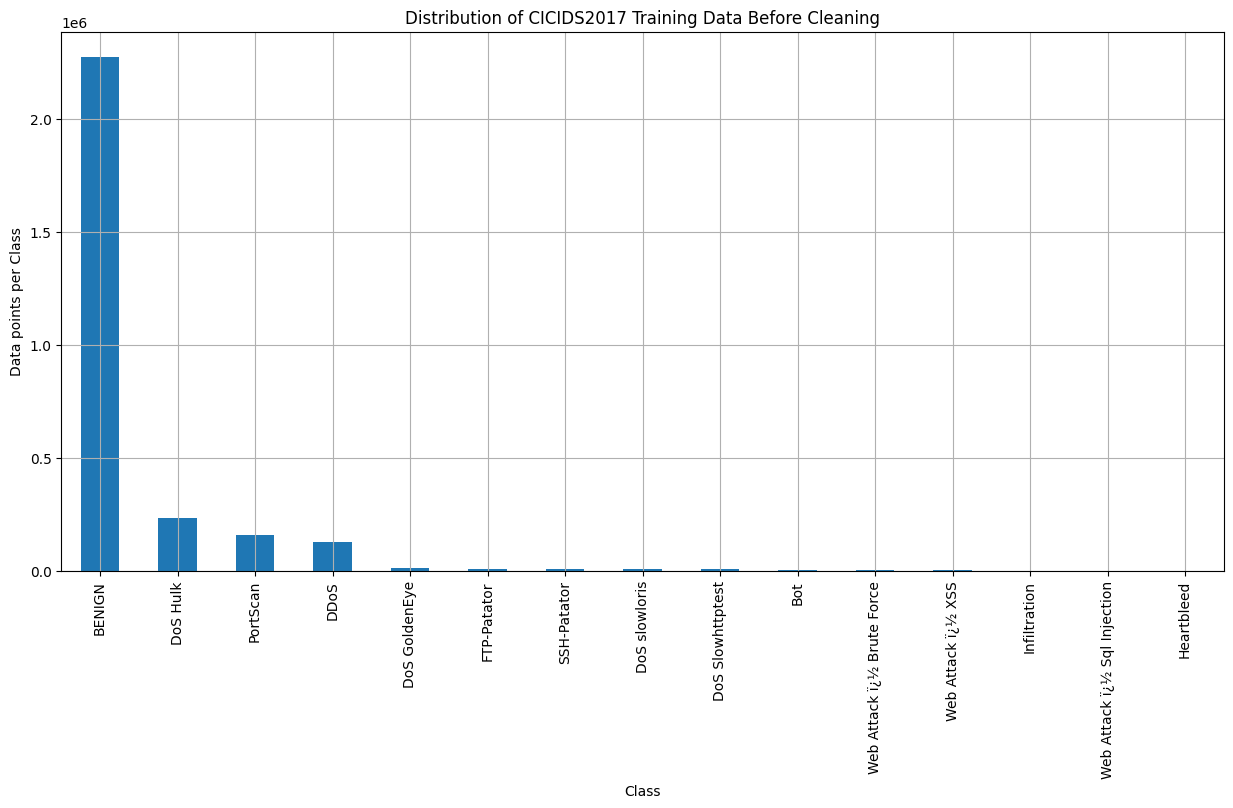

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of CICIDS2017 Training Data Before Cleaning')
plt.grid()
plt.show()

In [13]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 2273097 ( 80.3 %)
Number of data points in class DoS Hulk : 231073 ( 8.163 %)
Number of data points in class PortScan : 158930 ( 5.614 %)
Number of data points in class DDoS : 128027 ( 4.523 %)
Number of data points in class DoS GoldenEye : 10293 ( 0.364 %)
Number of data points in class FTP-Patator : 7938 ( 0.28 %)
Number of data points in class SSH-Patator : 5897 ( 0.208 %)
Number of data points in class DoS slowloris : 5796 ( 0.205 %)
Number of data points in class DoS Slowhttptest : 5499 ( 0.194 %)
Number of data points in class Bot : 1966 ( 0.069 %)
Number of data points in class Web Attack ï¿½ Brute Force : 1507 ( 0.053 %)
Number of data points in class Web Attack ï¿½ XSS : 652 ( 0.023 %)
Number of data points in class Infiltration : 36 ( 0.001 %)
Number of data points in class Web Attack ï¿½ Sql Injection : 21 ( 0.001 %)
Number of data points in class Heartbleed : 11 ( 0.0 %)


In [14]:
del sorted_ds

#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Label'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 2829385 rows.


In [15]:
analyze(df)


2830743 rows
**  Destination Port:53805 (1%)
**  Flow Duration:1050899 (37%)
**  Total Fwd Packets:1432 (0%)
**  Total Backward Packets:1747 (0%)
** Total Length of Fwd Packets:17928 (0%)
**  Total Length of Bwd Packets:64698 (2%)
**  Fwd Packet Length Max:5279 (0%)
**  Fwd Packet Length Min:384 (0%)
**  Fwd Packet Length Mean:99716 (3%)
**  Fwd Packet Length Std:253909 (8%)
** Bwd Packet Length Max:4838 (0%)
**  Bwd Packet Length Min:583 (0%)
**  Bwd Packet Length Mean:147614 (5%)
**  Bwd Packet Length Std:248869 (8%)
** Flow Bytes/s:1593909 (56%)
**  Flow Packets/s:1240164 (43%)
**  Flow IAT Mean:1166311 (41%)
**  Flow IAT Std:1056642 (37%)
**  Flow IAT Max:580289 (20%)
**  Flow IAT Min:136316 (4%)
** Fwd IAT Total:493098 (17%)
**  Fwd IAT Mean:737737 (26%)
**  Fwd IAT Std:700313 (24%)
**  Fwd IAT Max:437316 (15%)
**  Fwd IAT Min:110631 (3%)
** Bwd IAT Total:414928 (14%)
**  Bwd IAT Mean:670824 (23%)
**  Bwd IAT Std:709042 (25%)
**  Bwd IAT Max:368285 (13%)
**  Bwd IAT Min:66074 (2%

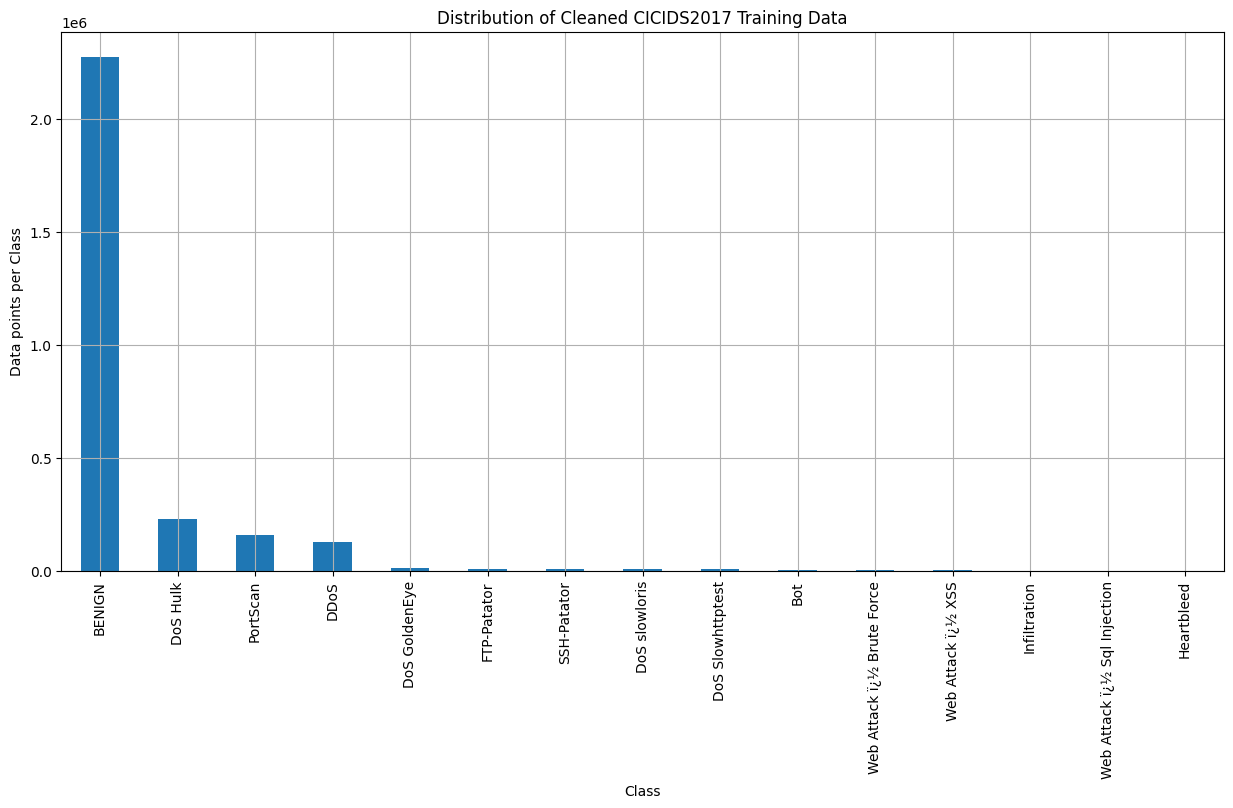

In [16]:
plt.figure(figsize=(15,7))
class_distribution = data_clean['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned CICIDS2017 Training Data')
plt.grid()
plt.show()

In [17]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 2272688 ( 80.286 %)
Number of data points in class DoS Hulk : 230124 ( 8.129 %)
Number of data points in class PortScan : 158930 ( 5.614 %)
Number of data points in class DDoS : 128027 ( 4.523 %)
Number of data points in class DoS GoldenEye : 10293 ( 0.364 %)
Number of data points in class FTP-Patator : 7938 ( 0.28 %)
Number of data points in class SSH-Patator : 5897 ( 0.208 %)
Number of data points in class DoS slowloris : 5796 ( 0.205 %)
Number of data points in class DoS Slowhttptest : 5499 ( 0.194 %)
Number of data points in class Bot : 1966 ( 0.069 %)
Number of data points in class Web Attack ï¿½ Brute Force : 1507 ( 0.053 %)
Number of data points in class Web Attack ï¿½ XSS : 652 ( 0.023 %)
Number of data points in class Infiltration : 36 ( 0.001 %)
Number of data points in class Web Attack ï¿½ Sql Injection : 21 ( 0.001 %)
Number of data points in class Heartbleed : 11 ( 0.0 %)


In [18]:
cols_to_drop = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp']

data_clean = data_clean.drop(columns=cols_to_drop, errors='ignore')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data_clean.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

,count
Label,
0,2272688
4,230124
10,158930
2,128027
3,10293
7,7938
11,5897
6,5796
5,5499


In [20]:
print(data_clean.shape)

(2829385, 81)


In [21]:
data_np = data_clean.to_numpy(dtype="float32")

#drop inf values
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:80]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,80:]).toarray()

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (2827876, 80)
Y.shape =  (2827876, 15)
X_train.shape =  (2120907, 80)
y_train.shape =  (2120907, 15)
X_test.shape =  (706969, 80)
y_test.shape =  (706969, 15)


In [23]:
print("X Shape: ", X.shape)
print("Y Shape: ", Y.shape)

X Shape:  (2827876, 80)
Y Shape:  (2827876, 15)


DNN

In [24]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics

import uuid
import gc
from tensorflow import keras
import tensorflow as tf

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import optimizers

n_features = X_train.shape[1]   # number of input features
n_classes = Y_train.shape[1]    # number of output classes

# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)

history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=2,
                              verbose=True, #,callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 15)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,463 (306.50 KB)

 Trainable params: 78,463 (306.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
16570/16570 ━━━━━━━━━━━━━━━━━━━━ 152s 9ms/step - accuracy: 0.9287 - loss: 0.0428 - val_accuracy: 0.9949 - val_loss: 0.0025
Epoch 2/2
16570/16570 ━━━━━━━━━━━━━━━━━━━━ 216s 10ms/step - accuracy: 0.9934 - loss: 0.0030 - val_accuracy: 0.9970 - val_loss: 0.0015


In [29]:
import tensorflow.keras.backend as K

print("Learning Rate - ")
print(K.eval(model.optimizer.learning_rate))  # ✅ use .learning_rate
print("==================================")
model.summary()

# save the model (safest to give a file name, not just a directory)
model.save('/content/Hamza_dnn.keras')   # TF2+ prefers .keras format

Learning Rate - 
1e-04


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 15)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,391 (919.50 KB)

 Trainable params: 78,463 (306.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 156,928 (613.00 KB)

In [30]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9971 - loss: 0.0015
22093/22093 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
Inference time: 82.50 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Completed
Time taken: 0:02:17.228481
Validation score: 0.9970437176170384
Evaluation score: [0.001526042353361845, 0.9970437288284302]
Recall score: 0.9970437176170384
Precision score: 0.9970300336272799
F1 Measure score: 0.9968792809152307
ROC-AUC score: 0.8314936367119766


In [31]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [32]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step


In [33]:
pred.shape
y_test.shape

(706969,)

In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[567055,      0,     48,     12,    219,     69,     11,    196,
             0,      0,     44,    122,    177,      0,      0],
       [   339,    172,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    88,      0,  31799,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    87,      0,      0,   2500,      0,      0,      1,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    67,      0,      0,      6,  57374,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    65,      0,      0,      0,      0,   1266,     30,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    75,      0,      0,      0,      0,     66,   1299,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    19,      0,      0,      0,  

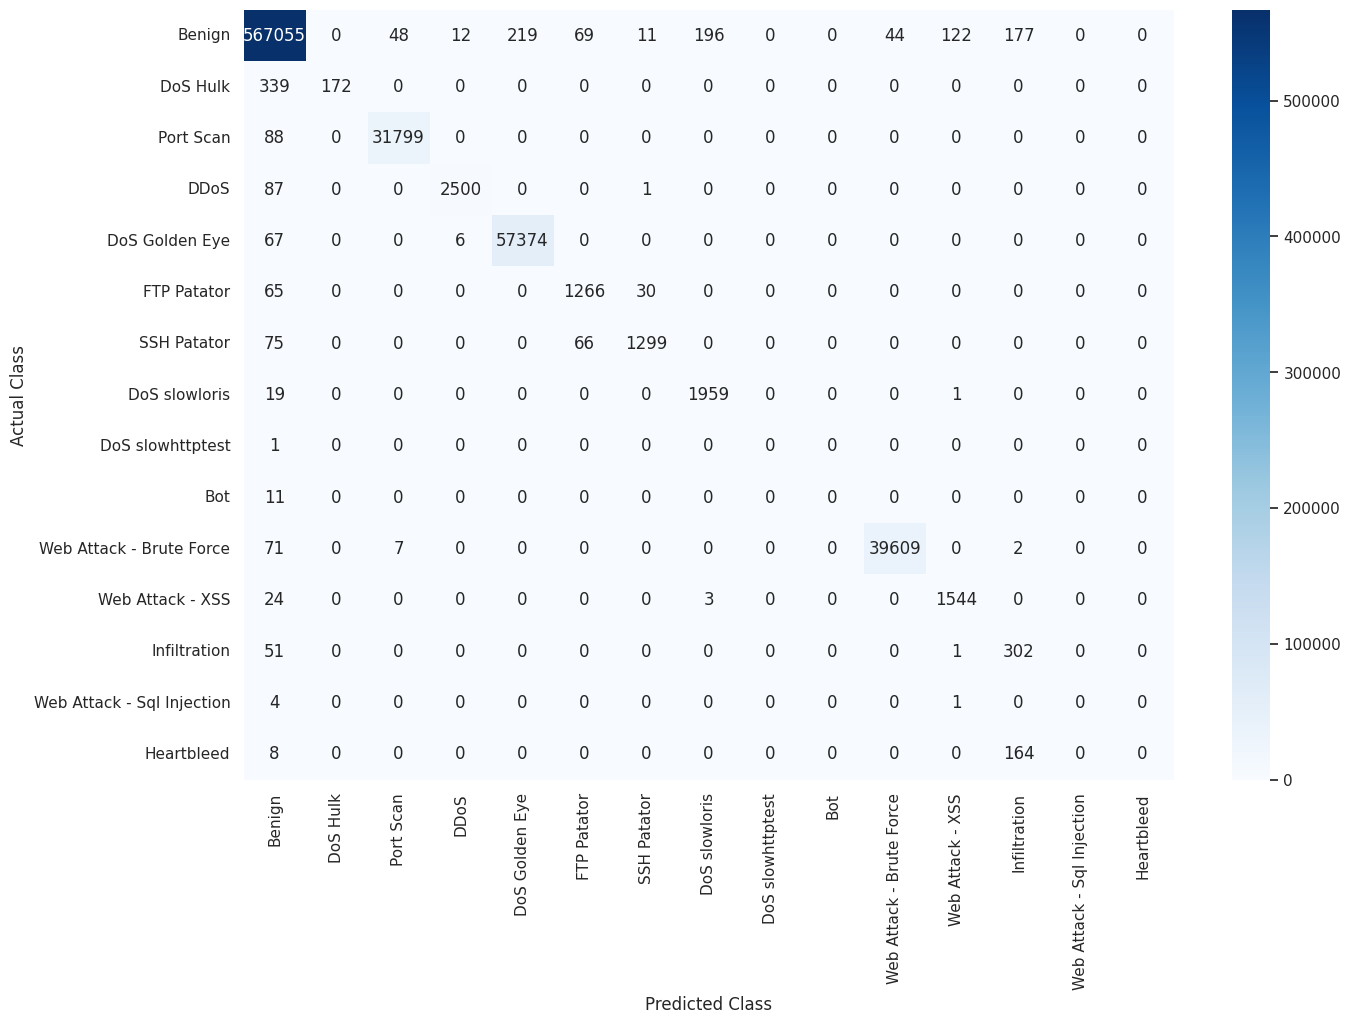

In [35]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

#plt.figure(figsize=(20,15))
#sn.set(font_scale=1.4)
sn.set(rc = {'figure.figsize':(15,10)})
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

plt.show()